# <font color='DarkRed'>**TESTE DE ESTACIONARIDADE**
    
https://www.w3schools.com/colors/colors_hex.asp    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

##  <font color='OrangeRed'>**Criação da Série**

In [4]:
np.random.seed(10)
dados1 = np.random.normal(0,1,41)
dados1

array([ 1.3315865 ,  0.71527897, -1.54540029, -0.00838385,  0.62133597,
       -0.72008556,  0.26551159,  0.10854853,  0.00429143, -0.17460021,
        0.43302619,  1.20303737, -0.96506567,  1.02827408,  0.22863013,
        0.44513761, -1.13660221,  0.13513688,  1.484537  , -1.07980489,
       -1.97772828, -1.7433723 ,  0.26607016,  2.38496733,  1.12369125,
        1.67262221,  0.09914922,  1.39799638, -0.27124799,  0.61320418,
       -0.26731719, -0.54930901,  0.1327083 , -0.47614201,  1.30847308,
        0.19501328,  0.40020999, -0.33763234,  1.25647226, -0.7319695 ,
        0.66023155])

In [5]:
dados1 = pd.DataFrame(dados1)
dados1.head()

,0
0,1.331587
1,0.715279
2,-1.545400
3,-0.008384
4,0.621336


In [6]:
dados1.columns = ['valores']
dados1.head()

,valores
0,1.331587
1,0.715279
2,-1.545400
3,-0.008384
4,0.621336


In [7]:
dados1.shape

(41, 1)

In [8]:
indice = pd.date_range('1980', periods = len(dados1), freq = 'Y')
indice

DatetimeIndex(['1980-12-31', '1981-12-31', '1982-12-31', '1983-12-31',
               '1984-12-31', '1985-12-31', '1986-12-31', '1987-12-31',
               '1988-12-31', '1989-12-31', '1990-12-31', '1991-12-31',
               '1992-12-31', '1993-12-31', '1994-12-31', '1995-12-31',
               '1996-12-31', '1997-12-31', '1998-12-31', '1999-12-31',
               '2000-12-31', '2001-12-31', '2002-12-31', '2003-12-31',
               '2004-12-31', '2005-12-31', '2006-12-31', '2007-12-31',
               '2008-12-31', '2009-12-31', '2010-12-31', '2011-12-31',
               '2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31',
               '2016-12-31', '2017-12-31', '2018-12-31', '2019-12-31',
               '2020-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [9]:
serie1 = pd.Series(dados1['valores'].values, index = indice)

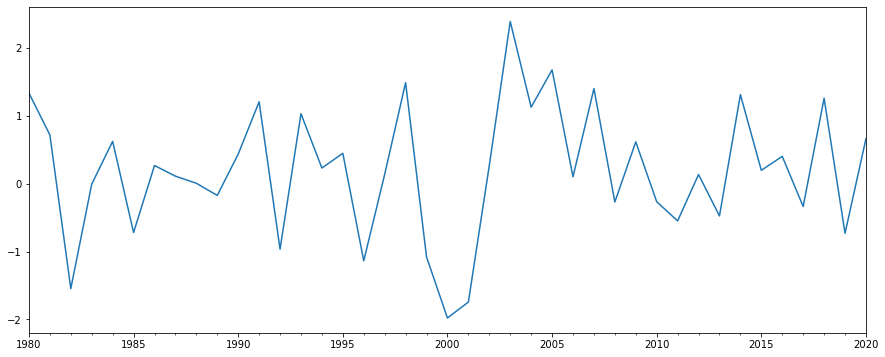

In [10]:
serie1.plot()
plt.show()

## <font color='OrangeRed'>**TESTES DE ESTACIONARIDADE**

In [11]:
import statsmodels.tsa.stattools

<font color='Navy'>**Teste KPSS (Kwiatkowski-Phillips-Schmidt-Shin)**

<font color='Navy'>**Ho = não é estacionário: estatística do teste > valor crítico**

<font color='Navy'>**Ha = é estacionário:  estatística do teste < valor crítico**

In [12]:
statsmodels.tsa.stattools.kpss(serie1)

/home/miguel/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.1917745767875152,
 0.1,
 10,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [13]:
kpss = statsmodels.tsa.stattools.kpss(serie1)
print('Estatítica do teste: {:.4f}'.format(kpss[0]))
print('p_valor: {:.4f}'.format(kpss[1]))
print('número de lags: {}'.format(kpss[2]))
print('Valores Críticos:')
for chave, valor in kpss[3].items():
   print('{}: {:.4f}'.format(chave, valor))

Estatítica do teste: 0.1918
p_valor: 0.1000
número de lags: 10
Valores Críticos:
10%: 0.3470
5%: 0.4630
2.5%: 0.5740
1%: 0.7390


/home/miguel/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


<font color='Navy'>**Teste df (Dickey Fuller)**

<font color='Navy'>**Ho = não é estacionário: estatística do teste > valor crítico**

<font color='Navy'>**Ha = é estacionário:  estatística do teste < valor crítico**

In [14]:
df = statsmodels.tsa.stattools.adfuller(serie1)
print('Estatítica do teste: {:.4f}'.format(df[0]))
print('p_valor: {:.8f}'.format(df[1]))
print('Valores Críticos:')
for chave, valor in df[4].items():
   print('{}: {:.4f}'.format(chave, valor))

Estatítica do teste: -5.8642
p_valor: 0.00000034
Valores Críticos:
1%: -3.6056
5%: -2.9371
10%: -2.6070


## <font color='OrangeRed'>**Dataset importado**

## <font color='green'>**AirPassengers: dados clássicos da companhia aérea Box & Jenkins. Totais mensais de passageiros de companhias aéreas internacionais, 1949 a 1960.**
 

In [15]:
serie2 = pd.read_csv('AirPassengers.csv')

In [16]:
serie2

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [17]:
serie2 = pd.Series(serie2['#Passengers'].values, index = serie2['Month'])
serie2

Month
1949-01    112
1949-02    118
1949-03    132
1949-04    129
1949-05    121
          ... 
1960-08    606
1960-09    508
1960-10    461
1960-11    390
1960-12    432
Length: 144, dtype: int64

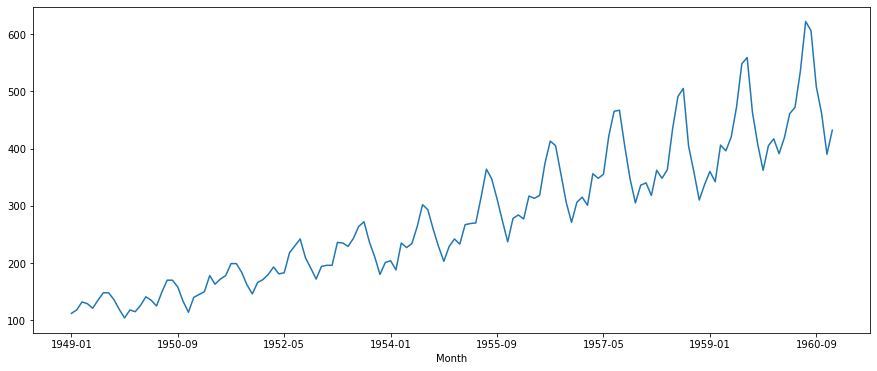

In [18]:
serie2.plot()
plt.show()

## <font color='OrangeRed'>**TESTES DE ESTACIONARIDADE**

In [19]:
import statsmodels.tsa.stattools

<font color='Navy'>**Teste KPSS (Kwiatkowski-Phillips-Schmidt-Shin)**

<font color='Navy'>**Ho = não é estacionário: estatística do teste > valor crítico**

<font color='Navy'>**Ha = é estacionário:  estatística do teste < valor crítico**

In [20]:
kpss2 = statsmodels.tsa.stattools.kpss(serie2)
print('Estatítica do teste: {:.4f}'.format(kpss2[0]))
print('p_valor: {:.4f}'.format(kpss2[1]))
print('Valores Críticos:')
for chave, valor in kpss2[3].items():
   print('{}: {:.4f}'.format(chave, valor))

Estatítica do teste: 1.0522
p_valor: 0.0100
Valores Críticos:
10%: 0.3470
5%: 0.4630
2.5%: 0.5740
1%: 0.7390


/home/miguel/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


<font color='Navy'>**Teste df (Dickey Fuller)**

<font color='Navy'>**Ho = não é estacionário: estatística do teste > valor crítico**

<font color='Navy'>**Ha = é estacionário:  estatística do teste < valor crítico**

In [21]:
df2 = statsmodels.tsa.stattools.adfuller(serie2)
print('Estatítica do teste: {:.4f}'.format(df2[0]))
print('p_valor: {:.8f}'.format(df2[1]))
print('Valores Críticos:')
for chave, valor in df2[4].items():
   print('{}: {:.4f}'.format(chave, valor))

Estatítica do teste: 0.8154
p_valor: 0.99188024
Valores Críticos:
1%: -3.4817
5%: -2.8840
10%: -2.5788
